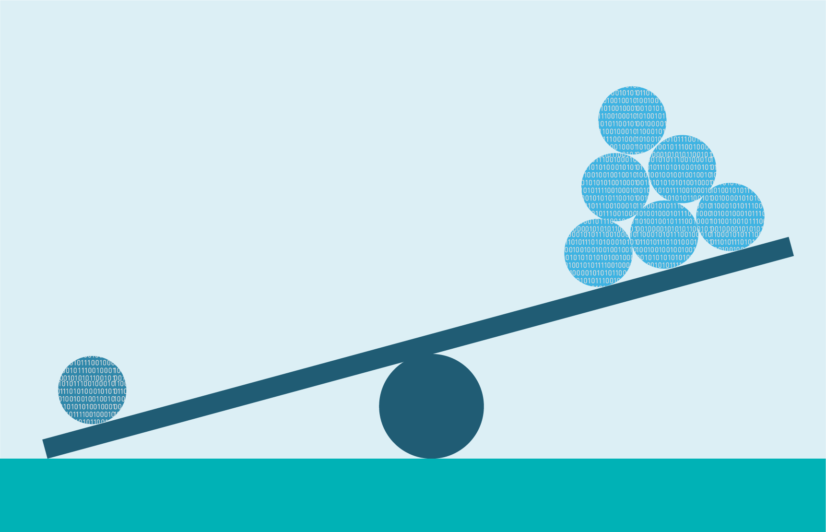

# Motivation

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
What would be the accuracy of a binary classification model that always predicts class 1:<br>
1. When the data has only class 1 samples?<br>
2. When the data has 50% class 1 samples and 50% class 2 samples?<br>
3. When the data has only class 2 samples?
</p></div>

<p style="line-height:1.75;font-size:16px">
Data imbalance in machine learning is a big issue that we face on a daily basis. Real-world data is often imbalanced by the sheer nature of it and running vanilla machine learning algorithms on it will simply not work as we expect. Consider data like credit card fraud, most of the transactions we'll encounter are legitimate transactions. However, for every few million of transactions we might encounter one fraudulant transaction. Having a model that always predicts 'Not Fraud' will give us an accuracy close to 100% but our model will be completely useless since it will never detect fraud (this is an extreme case of imbalance, referred to as anomaly detection).<br>
Luckily, most of the data we'll encounter won't be <b>that</b> extreme (unless you're working on anomaly detection) but it poses a problem nonetheless. We have a variety of tools that can help us deal with data imbalance but let's gain some more intuition with a simple example.

In [15]:
import pandas as pd

data = pd.read_csv('./data/cancer.csv')
data.head()

,Unnamed: 0,Gene 1,Gene 2,Target
0,0,0.598132,0.796215,0.0
1,1,0.384873,0.737143,0.0
2,2,0.813948,0.703431,1.0
3,3,0.888627,0.830119,0.0
4,4,0.273910,0.018859,0.0


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Unnamed: 0', 'Target'], axis=1), data['Target'], train_size=0.8)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.91875

<p style="line-height:1.75;font-size:16px">
The accuracy looks pretty good, a model that detects cancer with an accuracy of 92%. However, as we've already seen earlier, accuracy alone is not always a good metric. Let's look the confusion matrix.

In [4]:
from sklearn.metrics import confusion_matrix

y_pred= lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[185,   0],
       [ 15,   0]])

<p style="line-height:1.75;font-size:16px">
Ok, so we can already tell that our model <b>never</b> predicts cancer (second column) - that makes it completely useless (we could have just predicted 'no cancer' for any observation without building a model). Let's look at some other metrics that can help us detect issues with out model.

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       185
         1.0       0.00      0.00      0.00        15

    accuracy                           0.93       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.86      0.93      0.89       200



/Users/gadmarkovits/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gadmarkovits/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gadmarkovits/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

<p style="line-height:1.75;font-size:16px">
Once again we see that our model does not predict 'cancer' - precision and recall are both 0. 

# Dealing With Imbalance

<p style="line-height:1.75;font-size:16px">
There are various ways of dealing with data imbalance. Some update the data before it goes into the model, others update the model parmeters so it will work better. Other techniques only deal with metrics for interpreting the results. Let's look at a few popular options.

## Oversampling

<p style="line-height:1.75;font-size:16px">
Oversampling consists of replicating some points from the minority class in order to increase its cardinality. The idea here is that if we generate enough samples of the minority class, our classes will become balanced.

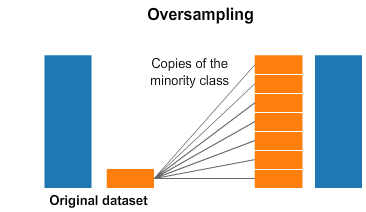

<p style="line-height:1.75;font-size:16px">
There are several way to perform oversampling the most straightforward one being random resampling where we just randomly choose examples from out minority class over and over again. Let's see it in action by using oversampling that has been implemented by a popular library called `imblearn` that deals with imbalanced datasets.

In [117]:
!pip install imbalanced-learn
!pip install delayed

You should consider upgrading via the '/Users/gadmarkovits/Anaconda/anaconda3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 72 kB 665 kB/s eta 0:00:01
You should consider upgrading via the '/Users/gadmarkovits/Anaconda/anaconda3/bin/python -m pip install --upgrade pip' command.


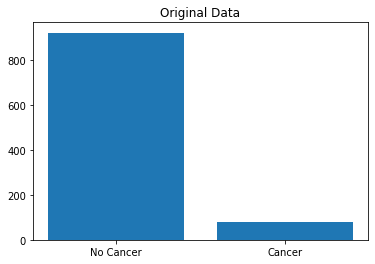

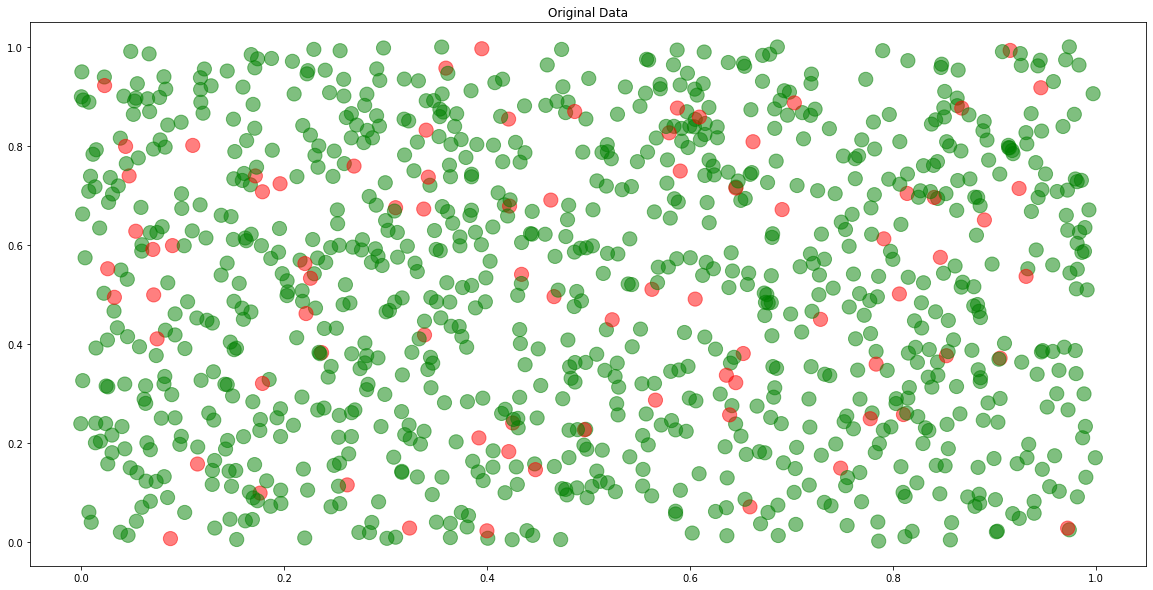

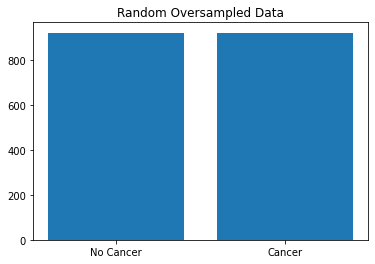

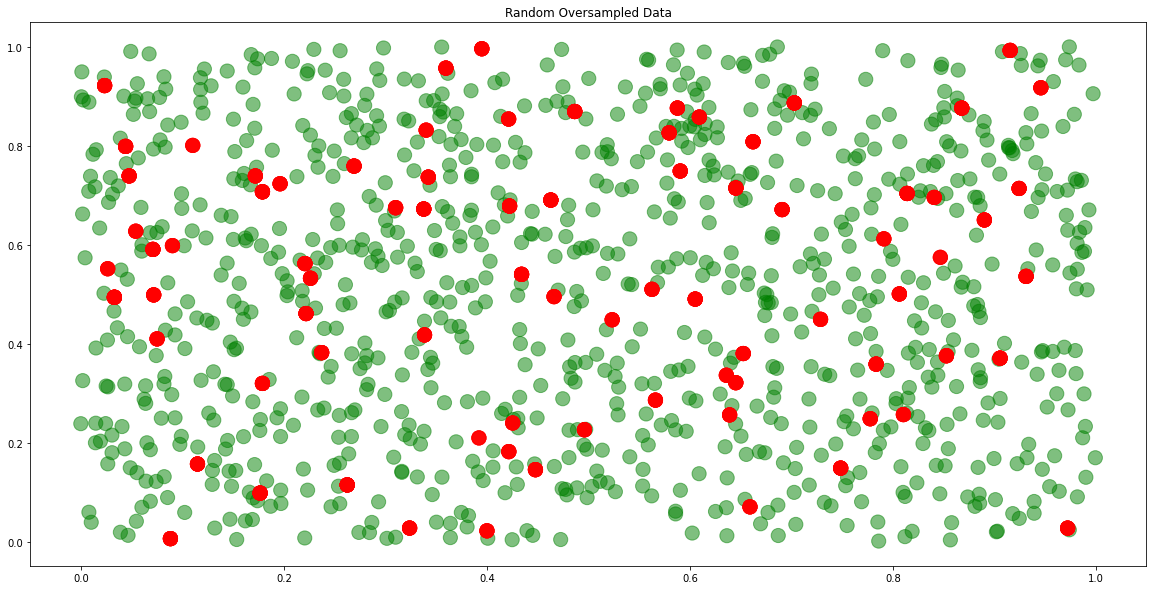

In [6]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data = pd.read_csv('./data/cancer.csv')

X = data.drop('Target', axis=1)
y = data['Target']
plt.bar(['No Cancer', 'Cancer'], height=[sum(y==0), sum(y==1)])
plt.title('Original Data')
plt.show()
colors = ['g' if e==0 else 'r' for e in y]
plt.figure(figsize=(20,10))
plt.scatter(X['Gene 1'], X['Gene 2'], c=colors, alpha=0.5, s=200)
plt.title('Original Data')
plt.show()

# This tells the sampler that the minority class should be sampled to match the majority class
# Another option is to set the sampling startegy to a number indicating the ratio between the minority and
# the majority class. sampling_strategy=0.5 for example means we want the minority class to be half the size of
# the majority class.
oversampler = RandomOverSampler(sampling_strategy='minority')
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)
plt.bar(['No Cancer', 'Cancer'], height=[sum(y_oversampled==0), sum(y_oversampled==1)])
plt.title('Random Oversampled Data')
plt.show()
colors = ['g' if e==0 else 'r' for e in y_oversampled]
plt.figure(figsize=(20,10))
plt.scatter(X_oversampled['Gene 1'], X_oversampled['Gene 2'], c=colors, alpha=0.5, s=200)
plt.title('Random Oversampled Data')
plt.show()

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


lr = LogisticRegression()
lr.fit(X_oversampled, y_oversampled)
y_pred = lr.predict(X_oversampled)
print(classification_report(y_oversampled, y_pred))
print(confusion_matrix(y_oversampled, y_pred))

NameError: name 'X_oversampled' is not defined

<p style="line-height:1.75;font-size:16px">
The results make much more sense now. Although our accuracy is very low now, we can see that the model at least attempts to predict the minority class. This data was randomly generated so an accuracy of about 50% makes total sense.<br>
<p style="line-height:1.75;font-size:16px">
<b>Points to remember</b><br>
Oversampling can increase overfitting since the model use copies of the same data. Also, this process increases our dataset which might lead to longer training times.

## Undersampling

<p style="line-height:1.75;font-size:16px">
In oversampling we sampled the minority class so that it will match the majority class. In undersampling we do the exact opposite - sample the majority class so that it matches the minority class.

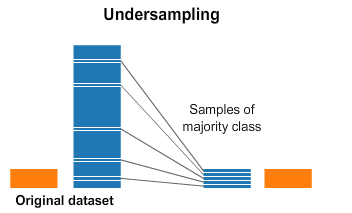

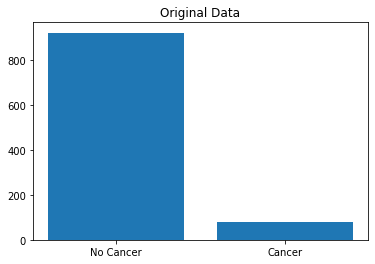

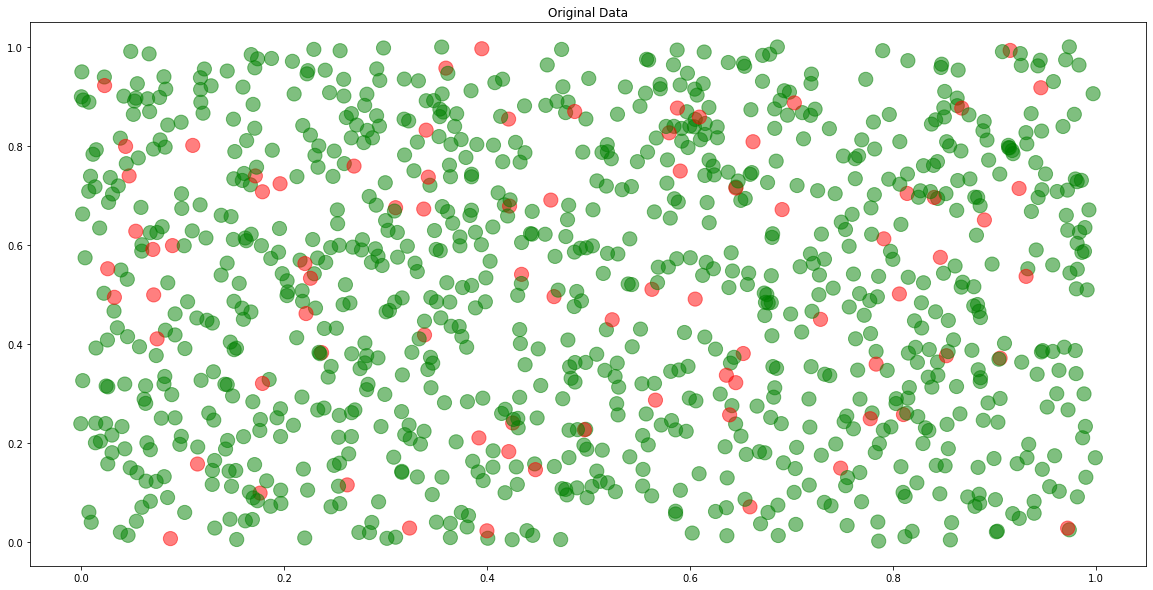

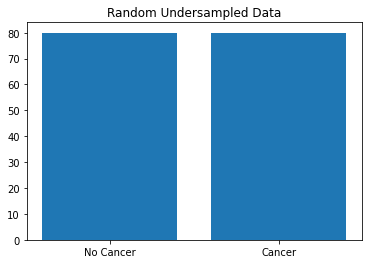

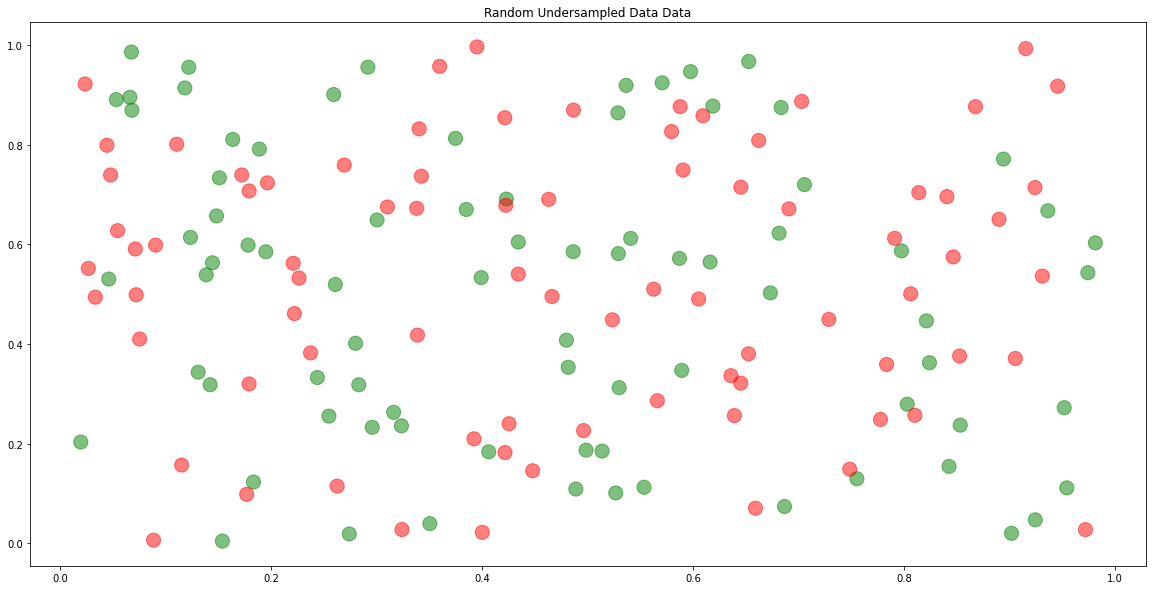

In [89]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data = pd.read_csv('./data/cancer.csv')

X = data.drop('Target', axis=1)
y = data['Target']
plt.bar(['No Cancer', 'Cancer'], height=[sum(y==0), sum(y==1)])
plt.title('Original Data')
plt.show()
colors = ['g' if e==0 else 'r' for e in y]
plt.figure(figsize=(20,10))
plt.scatter(X['Gene 1'], X['Gene 2'], c=colors, alpha=0.5, s=200)
plt.title('Original Data')
plt.show()

undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)
plt.bar(['No Cancer', 'Cancer'], height=[sum(y_undersampled==0), sum(y_undersampled==1)])
plt.title('Random Undersampled Data')
plt.show()
colors = ['g' if e==0 else 'r' for e in y_undersampled]
plt.figure(figsize=(20,10))
plt.scatter(X_undersampled['Gene 1'], X_undersampled['Gene 2'], c=colors, alpha=0.5, s=200)
plt.title('Random Undersampled Data Data')
plt.show()

<p style="line-height:1.75;font-size:16px">
<b>Points to remember</b><br>
Undersampling might discard important data that will hurt our model's performance.

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:14px"><b>Imbalanced Data</b></span><br>
There are many different algorithms that perform undersampling but we won't go into them. If you're interested in reading more <a href=https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/>this post</a> has an explantion about many of the common ones. 
</p></div>

## SMOTE

<p style="line-height:1.75;font-size:16px">
Synthetic Minority Oversampling Technique is an oversampling technique that uses the k-nearest neighbor algorithm to create synthetic data. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

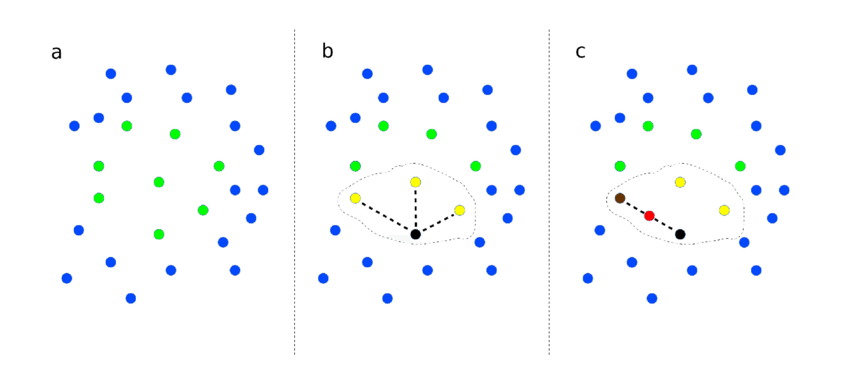

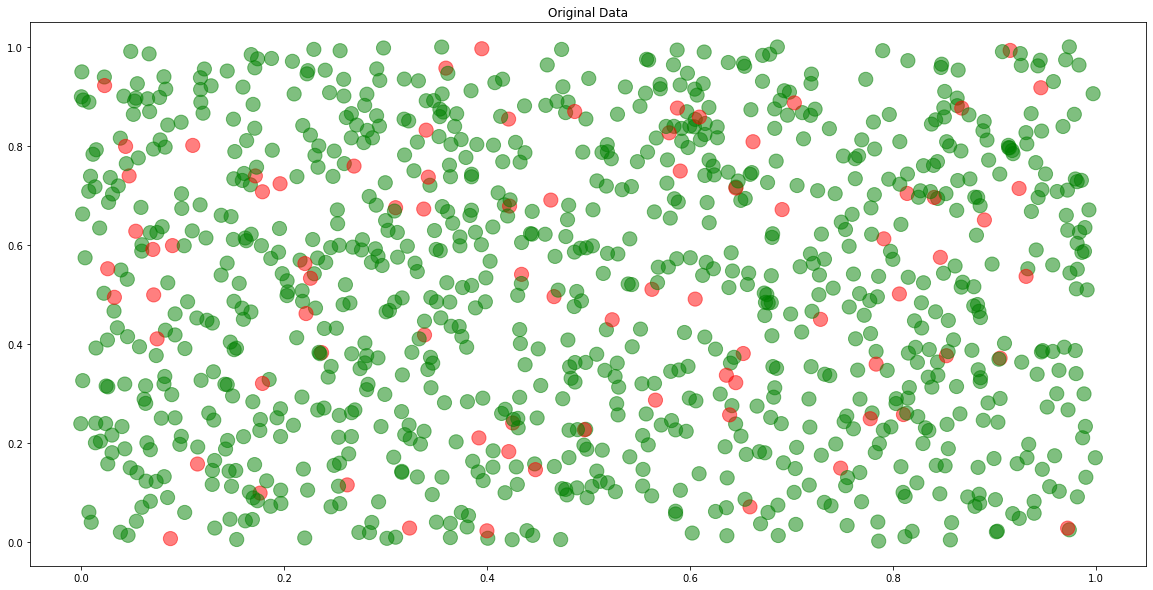

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data = pd.read_csv('./data/cancer.csv')

X = data.drop('Target', axis=1)
y = data['Target']

colors = ['g' if e==0 else 'r' for e in y]
plt.figure(figsize=(20,10))
plt.scatter(X['Gene 1'], X['Gene 2'], c=colors, alpha=0.5, s=200)
plt.title('Original Data')
plt.show()

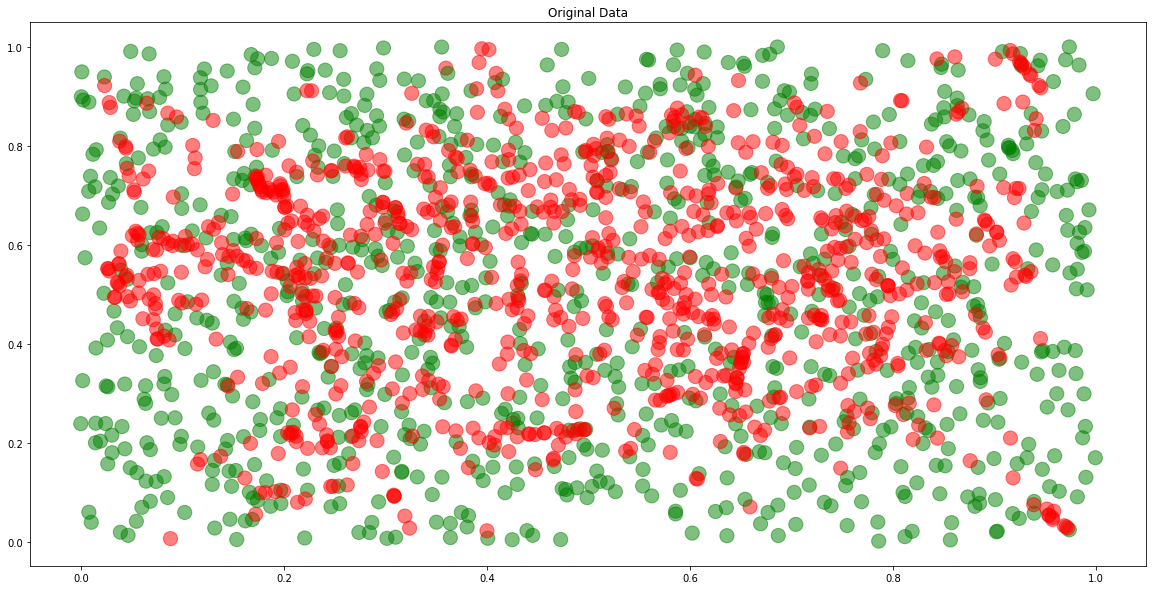

In [90]:
from imblearn.over_sampling import SMOTE

oversample_smote = SMOTE()
X_smote, y_smote = oversample_smote.fit_resample(X, y)

colors = ['g' if e==0 else 'r' for e in y_smote]
plt.figure(figsize=(20,10))
plt.scatter(X_smote['Gene 1'], X_smote['Gene 2'], c=colors, alpha=0.5, s=200)
plt.title('Original Data')
plt.show()

<p style="line-height:1.75;font-size:16px">
<b>Points to remember</b><br>
SMOTE is better than random oversampling in terms of overfitting since synthetic examples are generated rather than replication of instances. IT's simple to implement and interpret but is not very practical for high dimensional data. Also, SMOTE can introduce more noise into the data.

## ROC AUC

<p style="line-height:1.75;font-size:16px">
The Receiver Operating Characteristics (ROC) curve is a popular tool to understand the model's performance. An ROC curve visualizes an algorithm's ability to discriminate the positive class from the rest of the data. It does that by plotting the model's True Positive Rate (TPR) again the False Positive Rate (FPR).
<center><h3>
$TPR=\frac{True~Positives}{True~Positives+False~Negatives}$
</h3>
</center>
<br>
<center><h3>
$FPR=\frac{False~Positives}{False~Positives+True~Negatives}$
</h3>
</center>

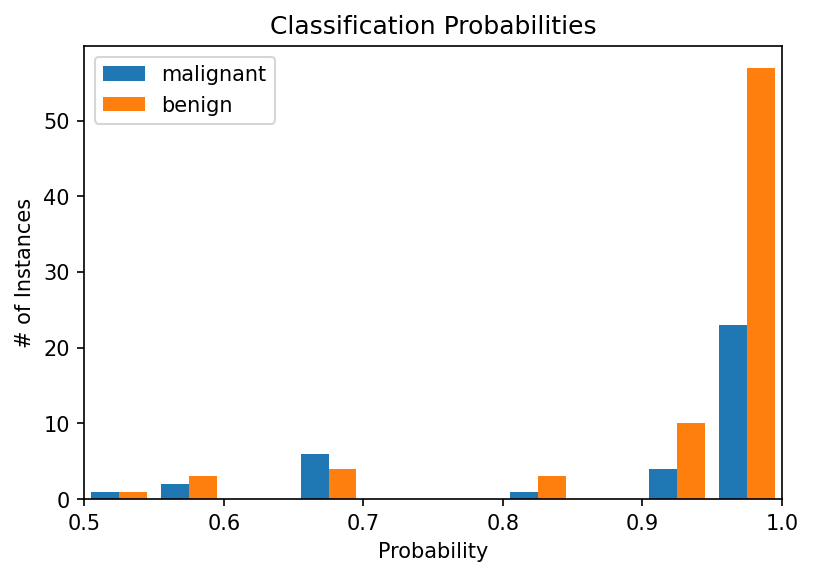

In [96]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

target_names = list(breast_cancer.target_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf.fit(X_train, y_train)

probas = rf_clf.predict_proba(X_test)

plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(target_names)
plt.show()

<p style="line-height:1.75;font-size:16px">
We can see that the threshold we select for the model will greatly affect its performance so how do we choose the correct one?

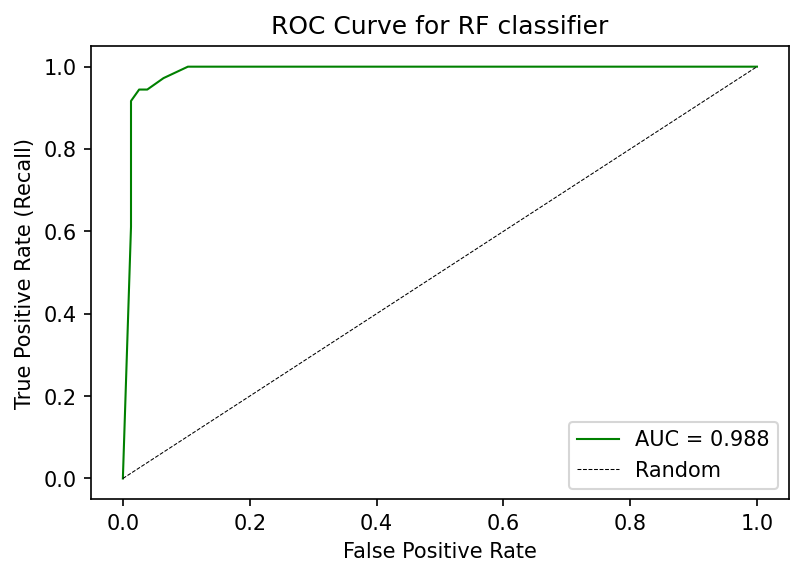

In [97]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], '--k', lw=0.5, label='Random')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [98]:
thresholds

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

<p style="line-height:1.75;font-size:16px">
We want our models to be a left and to the top as possible because that's the point where we have the lest false positive and the most true positives. The line going through the center basically shows us a model that has no skill meaning it is not better than just flipping a coin. Looking at the plot, we can clearly see the tradeoff between TPR and FPR - improving one usually means hurting the other. 
<p style="line-height:1.75;font-size:16px">
The ROC curve gives us the TPR and FPR and various thresholds and it's up to us to decide which one to use. However, when we want to quantify how good a model is and compare it to other models, we usually calculate the area under the curv (AUC).

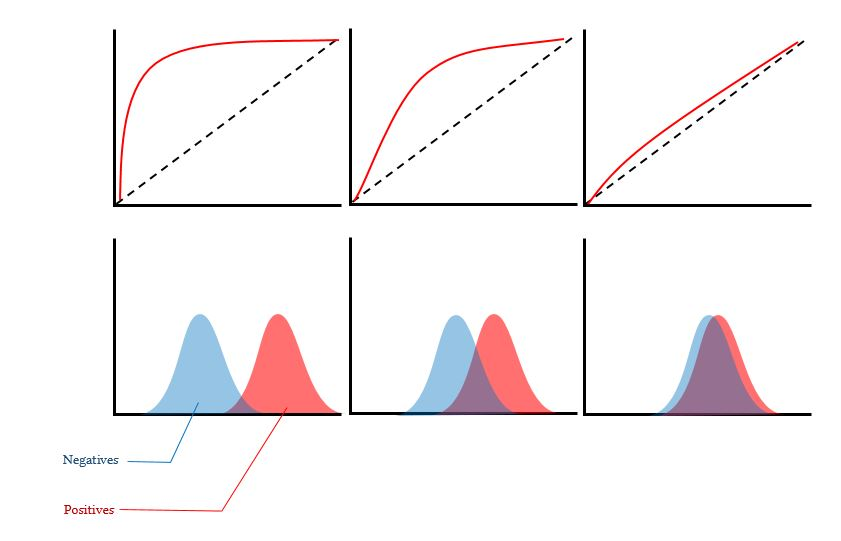

<p style="line-height:1.75;font-size:16px">
<b>Points to remember</b><br>
The ROC curves plot FPR vs. TPR as shown earlier. ROC is usually not a good choice when dealing with imbalanced data - more on that later.

## PR AUC

<p style="line-height:1.75;font-size:16px">
The Precision-Recall curve, as the name suggests, is a plot depicting the relationship between precision and recall at different decision thresholds. Unlike the ROC curve, the PR curve is sensitive to class imbalance. 

<center><h3>
$Precision=\frac{TP}{TP+FP}$
</h3>
</center>
<br>
<center><h3>
$Recall=\frac{TP}{TP+FN}$
</h3>
</center>

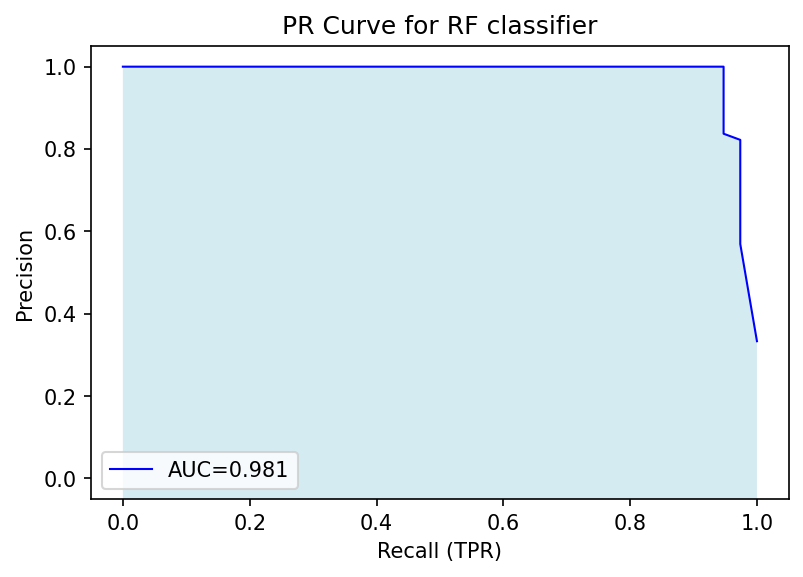

In [71]:
from sklearn.metrics import precision_recall_curve, auc


precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
avg_precision = average_precision_score(y_test, probas[:,1])
pr_auc = auc(recall, precision)

plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

## PR AUC vs ROC AUC

<p style="line-height:1.75;font-size:16px">
Let's look at the effect of imbalanced data on these two metrics.

Majority: 543; Minority: 9457


<Figure size 900x600 with 0 Axes>

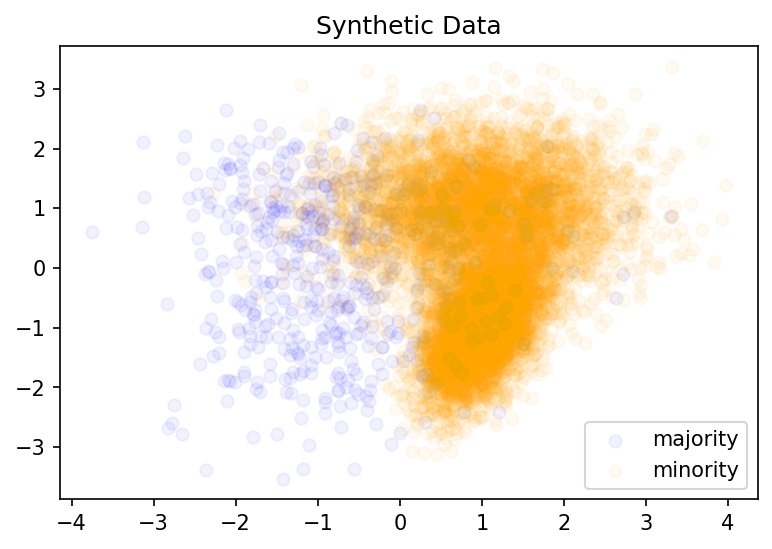

In [74]:
from sklearn.datasets import make_classification

# Synthetic data with imbalanced classes
minority_class_prevalence = 0.05
class_balance = [minority_class_prevalence, 1.0-minority_class_prevalence]

# make 2d data
X_2D, y = make_classification(n_classes=2, 
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_samples=10000,
                           weights=class_balance, 
                           random_state=10)

# print out classes
sum_class_2 = np.sum(y)
sum_class_1 = len(y) - sum_class_2
print(f"Majority: {sum_class_1}; Minority: {sum_class_2}")

# plot
plt.figure(dpi=150)
for c, i, t in zip(['blue', 'orange'], [0, 1], ['majority', 'minority']):
    # plot each column with a color pertaining to the labels
    plt.scatter(X_2D[y==i, 0], X_2D[y==i, 1], color=c, alpha=.05, lw=1, label=t)
plt.legend(loc='best')
plt.title('Synthetic Data')
plt.show()

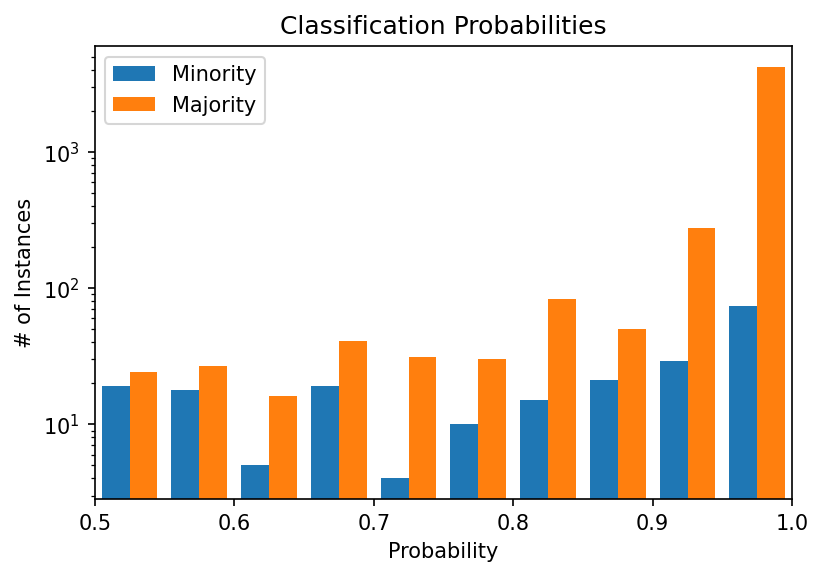

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size=0.5)

rf_clf = RandomForestClassifier(n_estimators=30)
rf_clf.fit(X_train, y_train)

probas = rf_clf.predict_proba(X_test)

plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.yscale('log')
plt.legend(['Minority', 'Majority'])
plt.show()

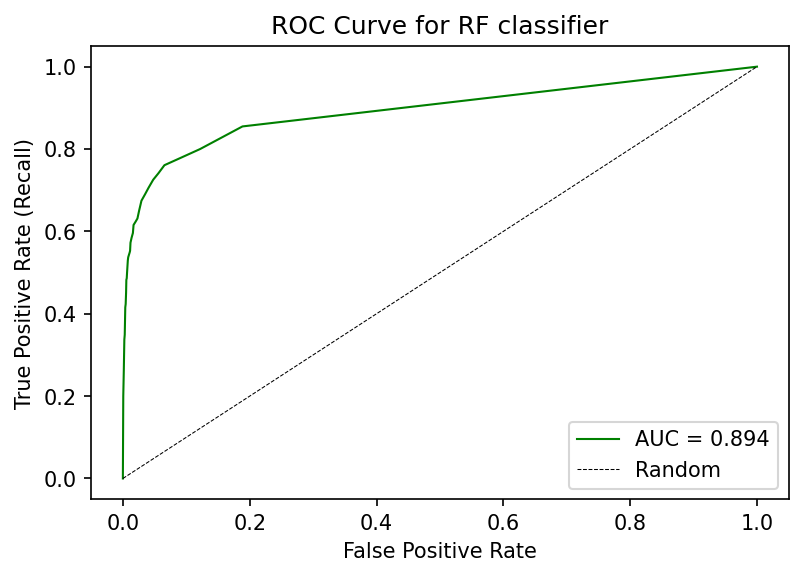

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], '--k', lw=0.5, label='Random')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

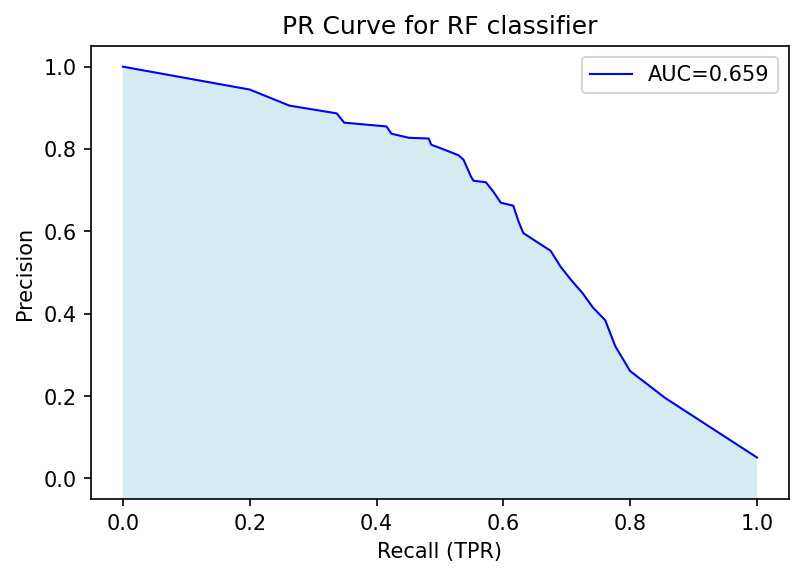

In [78]:
precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
pr_auc = auc(recall, precision)

plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

## Model Penalty

<p style="line-height:1.75;font-size:16px">
Classifiers in sklearn have an argument called `class_weight` which is a dictionary of the form {class_1: weight_1, class_2: weight_2}. The way it works is by multiplying errors that a model makes on a certain class by the weight we defined. That way, if there's a minority class we don't want the model to misclassify, we can give it a big weight to make sure the model pays extra attention to those samples. Let's see the effects of this argument in action.

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

data = pd.read_csv('./data/cancer.csv')

X = data.drop('Target', axis=1)
y = data['Target']

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)

for weight in [1, 10, 100]:
    # fit a model
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)

    print(f'Weight: {weight}')
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

Weight: 1
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       188
         1.0       0.00      0.00      0.00        12

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.88      0.94      0.91       200

Weight: 10
              precision    recall  f1-score   support

         0.0       0.94      0.66      0.78       188
         1.0       0.06      0.33      0.10        12

    accuracy                           0.65       200
   macro avg       0.50      0.50      0.44       200
weighted avg       0.89      0.65      0.74       200



/Users/gadmarkovits/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gadmarkovits/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gadmarkovits/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Weight: 100
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       188
         1.0       0.06      1.00      0.11        12

    accuracy                           0.06       200
   macro avg       0.03      0.50      0.06       200
weighted avg       0.00      0.06      0.01       200



/Users/gadmarkovits/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gadmarkovits/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gadmarkovits/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

<p style="line-height:1.75;font-size:16px">
Altough the results are not very good (reminder: the data was generated randomly) we can see how the model shifts from predicting the majority class to predicting the minority class.

## Exercise

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px"><i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Load the credit card csv file from the data folder. It contains data about transactions where some of them a fraudulant. Using the different methods and metrics we talked abour try to build a model that does a good job at detecting the fraudulant transactions. Don't forget to look at the confusion matrix and classification report as well to get a better sense of how the model is performing.
</p>
</div>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('data/creditcard.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], stratify=df['Class'])

# Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

# SMOTE Oversampling
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

for X, y, method in [(X_oversampled, y_oversampled, 'Oversampling'), 
                     (X_smote, y_smote, 'SMOTE'), 
                     (X_undersampled, y_undersampled, 'Undersampling')]:
    clf = RandomForestClassifier(n_estimators=100, max_depth=5)
    clf.fit(X, y)
    print(f'Method: {method}')
    print(f'Train: {clf.score(X, y)}, Test: {clf.score(X_test, y_test)}')

Method: Oversampling
Train: 0.9636482582678347, Test: 0.997106822842055
Method: SMOTE
Train: 0.9735293290063591, Test: 0.9965590854189489
Method: Undersampling
Train: 0.9634146341463414, Test: 0.9886941378051178
